In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [169]:
df = pd.read_csv('song_data.csv')

In [170]:
df.drop(['song_name'], axis=1, inplace=True)

target = 'song_popularity'
features = [i for i in df.columns if i not in [target]]

nu = df[features].nunique().sort_values()
nf = []
cf = []

for i in range(df[features].shape[1]):
    if nu.values[i] <= 16:
        cf.append(nu.index[i])
    else:
        nf.append(nu.index[i])

In [171]:
print(df.head())

   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  
0  167.060               4          0.474  
1  105.256      

In [172]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB
None


In [173]:
print(df.describe())

       song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%   

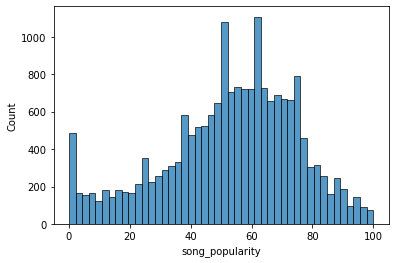

<Figure size 432x288 with 0 Axes>

In [174]:
sns.histplot(df['song_popularity'])
plt.show()
plt.clf()

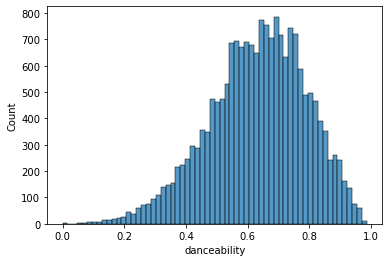

<Figure size 432x288 with 0 Axes>

In [175]:
sns.histplot(df['danceability'])
plt.show()
plt.clf()

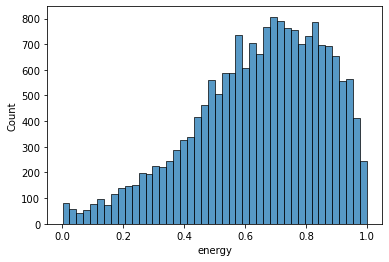

<Figure size 432x288 with 0 Axes>

In [176]:
sns.histplot(df['energy'])
plt.show()
plt.clf()

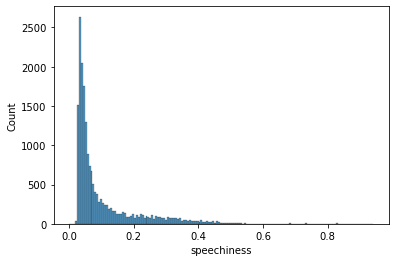

<Figure size 432x288 with 0 Axes>

In [177]:
sns.histplot(df['speechiness'])
plt.show()
plt.clf()

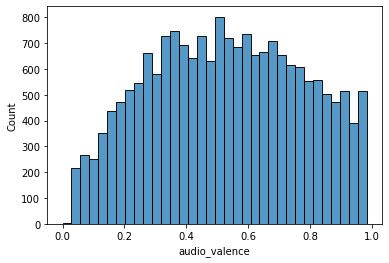

<Figure size 432x288 with 0 Axes>

In [178]:
sns.histplot(df['audio_valence'])
plt.show()
plt.clf()

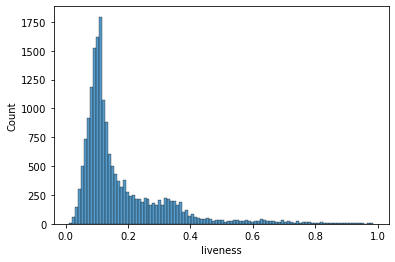

<Figure size 432x288 with 0 Axes>

In [179]:
sns.histplot(df['liveness'])
plt.show()
plt.clf()

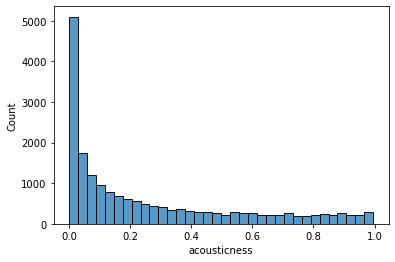

<Figure size 432x288 with 0 Axes>

In [180]:
sns.histplot(df['acousticness'])
plt.show()
plt.clf()

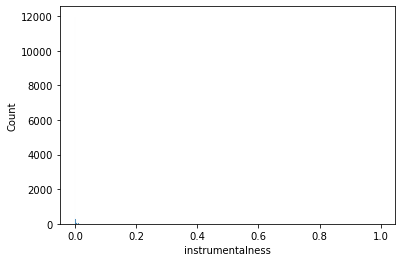

<Figure size 432x288 with 0 Axes>

In [181]:
sns.histplot(df['instrumentalness'])
plt.show()
plt.clf()

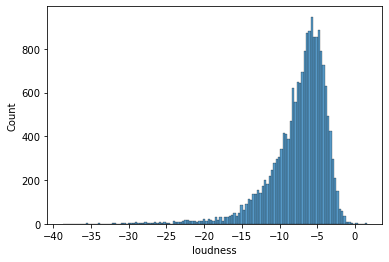

<Figure size 432x288 with 0 Axes>

In [182]:
sns.histplot(df['loudness'])
plt.show()
plt.clf()

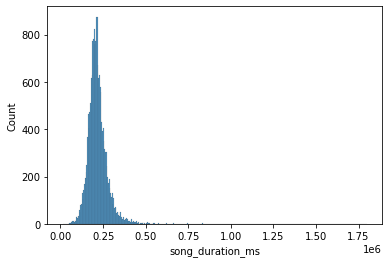

<Figure size 432x288 with 0 Axes>

In [183]:
sns.histplot(df['song_duration_ms'])
plt.show()
plt.clf()

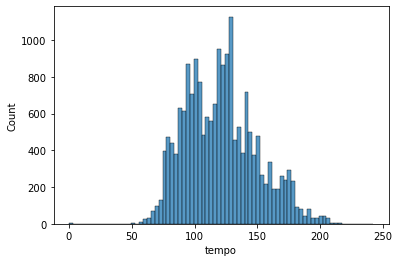

<Figure size 432x288 with 0 Axes>

In [184]:
sns.histplot(df['tempo'])
plt.show()
plt.clf()

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


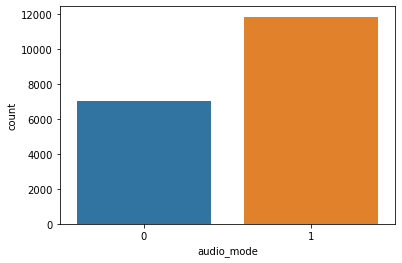

<Figure size 432x288 with 0 Axes>

In [185]:
sns.countplot(df['audio_mode'])
plt.show()
plt.clf()

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


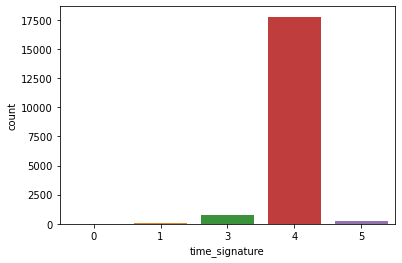

<Figure size 432x288 with 0 Axes>

In [186]:
sns.countplot(df['time_signature'])
plt.show()
plt.clf()

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


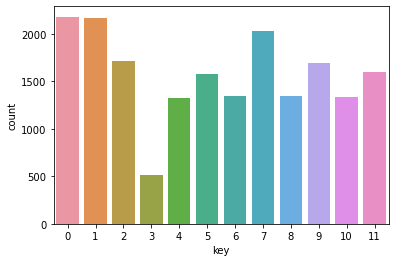

<Figure size 432x288 with 0 Axes>

In [187]:
sns.countplot(df['key'])
plt.show()
plt.clf()

In [188]:
one_hot_ts = pd.get_dummies(df.time_signature, prefix='time_signature')
df = df.drop('time_signature', axis=1)
df = df.join(one_hot_ts)
print(df.head())

   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  audio_valence  time_signature_0  time_signature_1  \
0  167.060          0.474              

In [189]:
one_hot_key = pd.get_dummies(df.key, prefix='key')
df = df.drop('key', axis=1)
df = df.join(one_hot_key)
print(df.head())

   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  liveness  loudness  audio_mode  speechiness  ...  key_2  \
0          0.000029    0.0589    -4.095           1       0.0294  ...      0   
1          0.000000    0.1080    -6.407           0       0.0498  ...      0   
2          0.447000    0.2550    -7.828           1       0.0792  ...      0   
3          0.003550    0.1020    -4.938           1       0.1070  ...      0   
4          0.000000    0.1130    -5.065           1       0.0313  ...      0   

   key_3  key_4  key_5  key_6  key_7  key_8  key_9  key_10  ke

In [190]:
one_hot_am = pd.get_dummies(df.audio_mode, prefix='audio_mode')
df = df.drop('audio_mode', axis=1)
df = df.join(one_hot_am)
print(df.head())

   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  liveness  loudness  speechiness    tempo  ...  key_4  \
0          0.000029    0.0589    -4.095       0.0294  167.060  ...      0   
1          0.000000    0.1080    -6.407       0.0498  105.256  ...      0   
2          0.447000    0.2550    -7.828       0.0792  123.881  ...      0   
3          0.003550    0.1020    -4.938       0.1070  122.444  ...      0   
4          0.000000    0.1130    -5.065       0.0313  172.011  ...      0   

   key_5  key_6  key_7  key_8  key_9  key_10  key_11  audio_mode_0  \
0      0  

In [191]:
df1 = df.copy()

features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
    
df = df1.copy()

In [192]:
X = df.loc[:, "song_duration_ms" : "audio_mode_1"]

In [193]:
y = df.loc[:, "song_popularity"]

In [194]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 100)
train_x.reset_index(drop=True, inplace=True)

In [195]:
print(train_x.head())

   song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0            196773      0.000933         0.406   0.919          0.000099   
1            252666      0.119000         0.597   0.564          0.000000   
2            177073      0.007190         0.732   0.734          0.000015   
3            269560      0.922000         0.422   0.264          0.000000   
4            229282      0.127000         0.627   0.715          0.000000   

   liveness  loudness  speechiness    tempo  audio_valence  ...  key_4  key_5  \
0    0.0726    -4.675       0.1030   93.274          0.601  ...      0      0   
1    0.2290    -6.968       0.2300  135.920          0.233  ...      0      0   
2    0.3400    -6.423       0.1070  123.033          0.643  ...      0      0   
3    0.1320    -7.064       0.0322  119.930          0.331  ...      0      0   
4    0.0768    -5.019       0.0329  115.005          0.481  ...      0      0   

   key_6  key_7  key_8  key_9  key_10  key_11  aud

In [201]:
scaler = StandardScaler()

train_x = scaler.fit_transform(train_x)
train_x = pd.DataFrame(train_x, columns=X.columns)

test_x = scaler.fit_transform(test_x)
test_x = pd.DataFrame(test_x, columns=X.columns)

In [203]:
model = LinearRegression()

model.fit(train_x, train_y)

In [223]:
pred1 = model.predict(train_x)
pred2 = model.predict(test_x)

print('The Coeffecient of the Regresion Model was found to be ',model.coef_)
print('The Intercept of the Regresion Model was found to be ',model.intercept_)

The Coeffecient of the Regresion Model was found to be  [ 6.77323653e-01 -1.70351626e+00  2.20493469e+00 -3.11486124e+00
 -5.88573538e-01 -5.46691662e-01  4.11376371e+00 -1.79888656e-02
 -1.73782292e-01 -2.12136334e+00 -1.09324242e+10  5.78971470e+11
  2.23199783e+12  2.54017620e+12  1.11775189e+12  4.61230217e+12
  4.50072313e+12  4.04225817e+12  2.28491002e+12  3.63534683e+12
  4.06995980e+12  3.74871380e+12  4.43714666e+12  3.78971856e+12
  4.13577855e+12  3.54499873e+12  4.04225817e+12 -5.49802709e+12
 -5.49802709e+12]
The Intercept of the Regresion Model was found to be  55.173865287463116


In [221]:
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(train_x.loc[:,train_x.nunique()>=50].columns.values,3,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=train_y, x=train_x[i], label='Actual')
        plt.scatter(y=pred1, x=train_x[i], label='Prediction')
        plt.legend()
    plt.show()
    
    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(train_y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(train_y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(train_y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(train_y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(test_y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(test_y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(test_y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(test_y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(train_y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(test_y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(train_y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(test_y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(train_y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(test_y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(train_y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(test_y, pred2)),20)
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((train_y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(train_y,pred1)
    plt.plot([train_y.min(),train_y.max()],[train_y.min(),train_y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

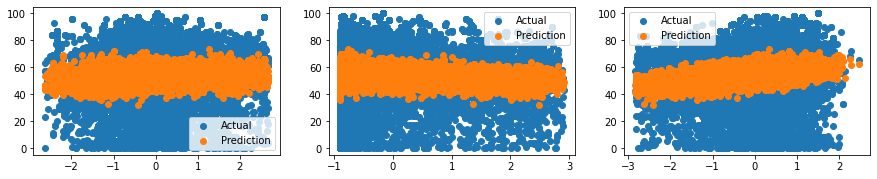



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.056978181208662826
Residual Sum of Squares (RSS) on Training set  ---> 4159162.754583852
Mean Squared Error (MSE) on Training set       ---> 459.8300447301108
Root Mean Squared Error (RMSE) on Training set ---> 21.443648120833142

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -3.691014259379081e+20
Residual Sum of Squares (RSS) on Training set  ---> 4.085670827215336e+26
Mean Squared Error (MSE) on Training set       ---> 1.8062205248520494e+23
Root Mean Squared Error (RMSE) on Training set ---> 424996532321.3885

--------------------Residual Plots--------------------


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


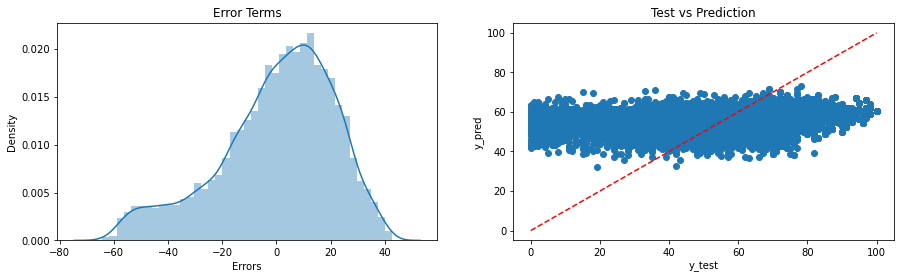

In [222]:
Evaluate(0, pred1, pred2)